In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = "/content/drive/MyDrive/Research/images"

In [ ]:
# extract the folder names from the directory
faces = sorted(os.listdir(folder_path))
# # create a list of face names
# faces = ["face" + str(i) for i in range(1, 11)]

In [ ]:
# load the images and preprocess them
images = []
for i in range(10):
    face_folder = f"face{i+1}"
    face_folder_path = os.path.join(folder_path, face_folder)
    for j in range(20):
        image_path = os.path.join(face_folder_path, f"{j+1}.jpg")
        image = Image.open(image_path)
        image = image.resize((128, 128))  # resize the images to a common size
        image = np.array(image.convert("L"))  # convert to grayscale numpy array
        images.append(image.flatten())

In [ ]:
images = np.array(images)

In [ ]:
# apply PCA to reduce the dimensionality of the images
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images)

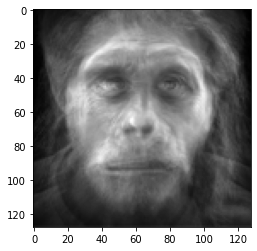

In [ ]:
# transform the PCA components back to the original image space
images_reconstructed = pca.inverse_transform(images_pca)

# calculate the average image from the reconstructed images
average_image = np.mean(images_reconstructed, axis=0)

# plot the overlaid image
plt.imshow(average_image.reshape(128, 128), cmap="gray")
plt.show()

In [ ]:


# project the average images onto the principal components
avg_images_pca = pca.transform(avg_images)

In [ ]:
# split the PCA transformed images by face identity
images_pca_split = np.array_split(images_pca, 10)

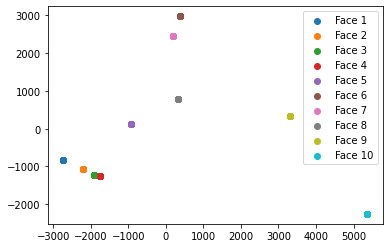

In [ ]:
# plot the PCA transformed images
fig, ax = plt.subplots()
for i in range(10):
    pca_split = images_pca_split[i]
    ax.scatter(pca_split[:, 0], pca_split[:, 1], label=f"Face {i+1}")
ax.legend()
plt.show()

In [ ]:
# calculate the distance matrix using the Euclidean distance metric
dist_matrix = squareform(pdist(images_pca, metric='euclidean'))

In [ ]:
# # print the distances between the images of different faces
# print("Distances between the images of different faces:")
# for i in range(10):
#     for j in range(i+1, 10):
#         face1_start = i * 20
#         face1_end = (i + 1) * 20
#         face2_start = j * 20
#         face2_end = (j + 1) * 20
#         face_distances = dist_matrix[face1_start:face1_end, face2_start:face2_end]
#         print(f"Distance between face {i+1} and face {j+1}: {np.mean(face_distances):.2f}")

In [ ]:

# # Print the distances between the images of different faces
# print("Distances between the images of different faces:")
# dist_data = []
# for i in range(10):
#     for j in range(i+1, 10):
#         face1_start = i * 20
#         face1_end = (i + 1) * 20
#         face2_start = j * 20
#         face2_end = (j + 1) * 20
#         face_distances = dist_matrix[face1_start:face1_end, face2_start:face2_end]
#         mean_distance = np.mean(face_distances)
#         dist_data.append((f"Face {i+1}", f"Face {j+1}", mean_distance))
#         print(f"Distance between face {i+1} and face {j+1}: {mean_distance:.2f}")

# # Create a table from the distances
# dist_df = pd.DataFrame(dist_data, columns=["Face 1", "Face 2", "Mean Distance"])
# print("\nDistances table:")
# print(dist_df.to_string(index=False))

In [ ]:
print("Distances between the images of different faces:")
print()
print("       "*10, end="")
for i in range(1, 11):
    print(f" Face{i}   ", end="")
print()

for i in range(1, 11):
    print(" Face%d  " % i, end="")
    for j in range(1, 11):
        if i == j:
            print("   -    ", end="")
        elif i < j:
            face1_start = (i-1) * 20
            face1_end = i * 20
            face2_start = (j-1) * 20
            face2_end = j * 20
            face_distances = dist_matrix[face1_start:face1_end, face2_start:face2_end]
            mean_distance = np.mean(face_distances)
            print(f" {mean_distance:.3f} ", end="")
        else:
            print("        ", end=""*10)
    print()

Distances between the images of different faces:

        Face1    Face2    Face3    Face4    Face5    Face6    Face7    Face8    Face9    Face10   
 Face1     -     592.047  929.765  1060.669  2037.547  4927.183  4392.401  3463.914  6177.511  8235.010 
 Face2             -     337.885  468.941  1739.439  4808.511  4253.362  3136.093  5705.509  7663.294 
 Face3                     -     135.737  1655.445  4785.777  4222.700  2998.023  5455.614  7342.463 
 Face4                             -     1599.206  4741.779  4176.496  2914.423  5333.570  7206.741 
 Face5                                     -     3148.871  2581.466  1426.370  4268.133  6740.475 
 Face6                                             -     569.478  2195.228  3941.218  7222.630 
 Face7                                                     -     1666.474  3771.224  6992.713 
 Face8                                                             -     3029.875  5887.533 
 Face9                                                   

In [ ]:
# print the distance table
print("Distance Table:\n")
print(" "*20, end="")
for i in range(10):
    print(f"Face {i+1:2d}", end=" "*10)
print()
for i in range(10):
    face1_start = i * 20
    face1_end = (i + 1) * 20
    print(f"Face {i+1:2d}", end=" "*10)
    for j in range(10):
        face2_start = j * 20
        face2_end = (j + 1) * 20
        face_distances = dist_matrix[face1_start:face1_end, face2_start:face2_end]
        mean_distance = np.mean(face_distances)
        print(f"{mean_distance:8.1f}", end=" "*9)
    print()

Distance Table:

                    Face  1          Face  2          Face  3          Face  4          Face  5          Face  6          Face  7          Face  8          Face  9          Face 10          
Face  1               0.0            592.0            929.8           1060.7           2037.5           4927.2           4392.4           3463.9           6177.5           8235.0         
Face  2             592.0              0.0            337.9            468.9           1739.4           4808.5           4253.4           3136.1           5705.5           7663.3         
Face  3             929.8            337.9              0.0            135.7           1655.4           4785.8           4222.7           2998.0           5455.6           7342.5         
Face  4            1060.7            468.9            135.7              0.0           1599.2           4741.8           4176.5           2914.4           5333.6           7206.7         
Face  5            2037.5           1739

In [ ]:
dist_table = np.zeros((10, 10))
for i in range(10):
    for j in range(i+1, 10):
        face1_start = i * 20
        face1_end = (i + 1) * 20
        face2_start = j * 20
        face2_end = (j + 1) * 20
        face_distances = dist_matrix[face1_start:face1_end, face2_start:face2_end]
        mean_distance = np.mean(face_distances)
        dist_table[i,j] = f"{mean_distance:8.1f}"
        dist_table[j,i] = f"{mean_distance:8.1f}"

In [ ]:
df = pd.DataFrame(dist_table, columns=faces, index=faces)
print(df)

         face1  face10   face2   face3   face4   face5   face6   face7  \
face1      0.0   592.0   929.8  1060.7  2037.5  4927.2  4392.4  3463.9   
face10   592.0     0.0   337.9   468.9  1739.4  4808.5  4253.4  3136.1   
face2    929.8   337.9     0.0   135.7  1655.4  4785.8  4222.7  2998.0   
face3   1060.7   468.9   135.7     0.0  1599.2  4741.8  4176.5  2914.4   
face4   2037.5  1739.4  1655.4  1599.2     0.0  3148.9  2581.5  1426.4   
face5   4927.2  4808.5  4785.8  4741.8  3148.9     0.0   569.5  2195.2   
face6   4392.4  4253.4  4222.7  4176.5  2581.5   569.5     0.0  1666.5   
face7   3463.9  3136.1  2998.0  2914.4  1426.4  2195.2  1666.5     0.0   
face8   6177.5  5705.5  5455.6  5333.6  4268.1  3941.2  3771.2  3029.9   
face9   8235.0  7663.3  7342.5  7206.7  6740.5  7222.6  6992.7  5887.5   

         face8   face9  
face1   6177.5  8235.0  
face10  5705.5  7663.3  
face2   5455.6  7342.5  
face3   5333.6  7206.7  
face4   4268.1  6740.5  
face5   3941.2  7222.6  
face6   37

In [ ]:
# Create a pandas DataFrame and write it to an excel file
df = pd.DataFrame(dist_table, columns=faces, index=faces)
df.to_excel('distances.xlsx')

# Download the file
from google.colab import files
files.download('distances.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

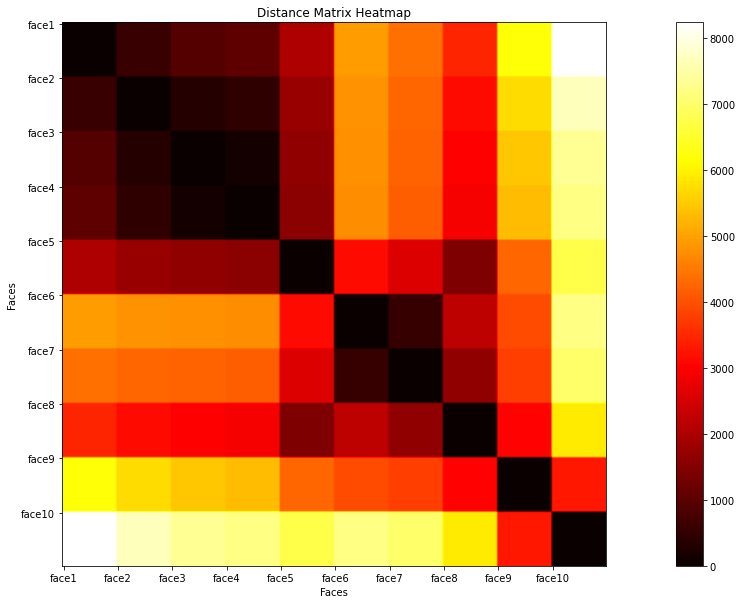

In [ ]:
# plot the heatmap of the distance matrix
fig, ax = plt.subplots(figsize=(25, 10))  # set the figure size
im = ax.imshow(dist_matrix, cmap="hot")

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# set the axis labels and title
ax.set_xticks(np.arange(0, 200, 20))
ax.set_yticks(np.arange(0, 200, 20))
ax.set_xticklabels(["face1", "face2", "face3", "face4", "face5", "face6", "face7", "face8", "face9", "face10"])
ax.set_yticklabels(["face1", "face2", "face3", "face4", "face5", "face6", "face7", "face8", "face9", "face10"])
ax.set_xlabel("Faces")
ax.set_ylabel("Faces")
ax.set_title("Distance Matrix Heatmap")

# show the plot
plt.show()

In [ ]:
# calculate the distance matrix using the Manhattan distance metric
dist_matrix_manhattan = squareform(pdist(images_pca, metric='cityblock'))

In [ ]:
# print the distances between the images of different faces
print("Distances between the images of different faces:")
for i in range(10):
    for j in range(i+1, 10):
        face1_start = i * 20
        face1_end = (i + 1) * 20
        face2_start = j * 20
        face2_end = (j + 1) * 20
        face_distances = dist_matrix_manhattan[face1_start:face1_end, face2_start:face2_end]
        print(f"Distance between face {i+1} and face {j+1}: {np.mean(face_distances):.2f}")

Distances between the images of different faces:
Distance between face 1 and face 2: 783.97
Distance between face 1 and face 3: 1237.65
Distance between face 1 and face 4: 1392.67
Distance between face 1 and face 5: 2753.02
Distance between face 1 and face 6: 6934.86
Distance between face 1 and face 7: 6202.18
Distance between face 1 and face 8: 4678.42
Distance between face 1 and face 9: 7242.61
Distance between face 1 and face 10: 9531.70
Distance between face 2 and face 3: 453.68
Distance between face 2 and face 4: 608.70
Distance between face 2 and face 5: 2459.03
Distance between face 2 and face 6: 6640.86
Distance between face 2 and face 7: 5908.19
Distance between face 2 and face 8: 4384.43
Distance between face 2 and face 9: 6948.62
Distance between face 2 and face 10: 8747.73
Distance between face 3 and face 4: 155.02
Distance between face 3 and face 5: 2308.99
Distance between face 3 and face 6: 6490.83
Distance between face 3 and face 7: 5758.16
Distance between face 3 and f

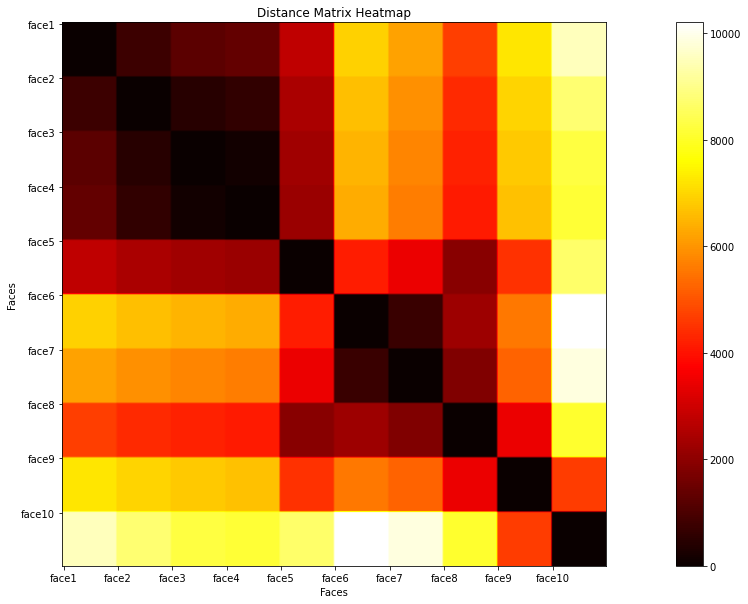

In [ ]:
# plot the heatmap of the distance matrix
fig, ax = plt.subplots(figsize=(25, 10))  # set the figure size
im = ax.imshow(dist_matrix_manhattan, cmap="hot")

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# set the axis labels and title
ax.set_xticks(np.arange(0, 200, 20))
ax.set_yticks(np.arange(0, 200, 20))
ax.set_xticklabels(["face1", "face2", "face3", "face4", "face5", "face6", "face7", "face8", "face9", "face10"])
ax.set_yticklabels(["face1", "face2", "face3", "face4", "face5", "face6", "face7", "face8", "face9", "face10"])
ax.set_xlabel("Faces")
ax.set_ylabel("Faces")
ax.set_title("Distance Matrix Heatmap")

# show the plot
plt.show()

In [ ]:
# calculate the distance matrix using the Cosine distance metric
dist_matrix_cosine = squareform(pdist(images_pca, metric='cosine'))

In [ ]:
# print the distances between the images of different faces
print("Distances between the images of different faces:")
for i in range(10):
    for j in range(i+1, 10):
        face1_start = i * 20
        face1_end = (i + 1) * 20
        face2_start = j * 20
        face2_end = (j + 1) * 20
        face_distances = dist_matrix_cosine[face1_start:face1_end, face2_start:face2_end]
        print(f"Distance between face {i+1} and face {j+1}: {np.mean(face_distances):.2f}")

Distances between the images of different faces:
Distance between face 1 and face 2: 0.01
Distance between face 1 and face 3: 0.04
Distance between face 1 and face 4: 0.05
Distance between face 1 and face 5: 0.09
Distance between face 1 and face 6: 1.41
Distance between face 1 and face 7: 1.36
Distance between face 1 and face 8: 1.63
Distance between face 1 and face 9: 1.98
Distance between face 1 and face 10: 1.77
Distance between face 2 and face 3: 0.01
Distance between face 2 and face 4: 0.01
Distance between face 2 and face 5: 0.16
Distance between face 2 and face 6: 1.55
Distance between face 2 and face 7: 1.51
Distance between face 2 and face 8: 1.75
Distance between face 2 and face 9: 1.94
Distance between face 2 and face 10: 1.66
Distance between face 3 and face 4: 0.00
Distance between face 3 and face 5: 0.23
Distance between face 3 and face 6: 1.65
Distance between face 3 and face 7: 1.60
Distance between face 3 and face 8: 1.82
Distance between face 3 and face 9: 1.89
Distan

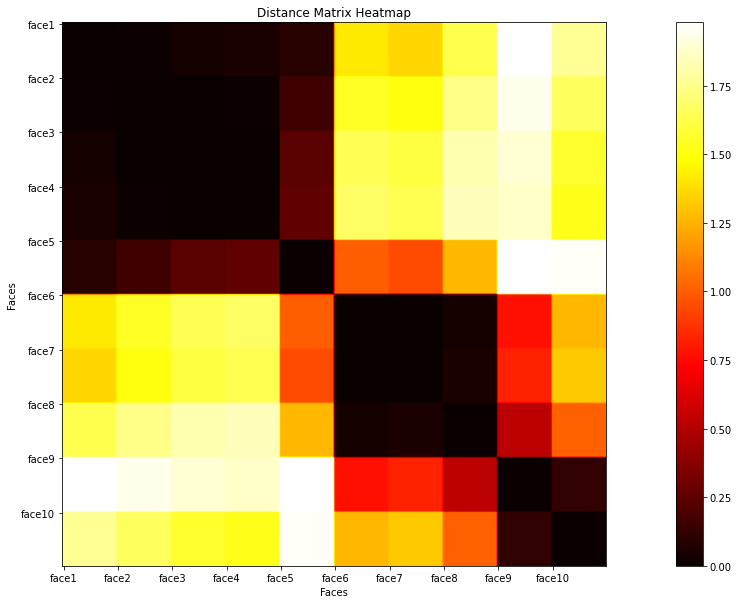

In [ ]:
# plot the heatmap of the distance matrix
fig, ax = plt.subplots(figsize=(25, 10))  # set the figure size
im = ax.imshow(dist_matrix_cosine, cmap="hot")

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# set the axis labels and title
ax.set_xticks(np.arange(0, 200, 20))
ax.set_yticks(np.arange(0, 200, 20))
ax.set_xticklabels(["face1", "face2", "face3", "face4", "face5", "face6", "face7", "face8", "face9", "face10"])
ax.set_yticklabels(["face1", "face2", "face3", "face4", "face5", "face6", "face7", "face8", "face9", "face10"])
ax.set_xlabel("Faces")
ax.set_ylabel("Faces")
ax.set_title("Distance Matrix Heatmap")

# show the plot
plt.show()

In [ ]:
# create a list of face names
faces = ["face" + str(i) for i in range(1, 11)]

In [ ]:
# # create a DataFrame for each distance matrix
# df_euclidean = pd.DataFrame(dist_matrix.reshape(10, 10), index=faces, columns=faces)
# df_manhattan = pd.DataFrame(dist_matrix_manhattan.reshape(10, 10), index=faces, columns=faces)
# df_cosine = pd.DataFrame(dist_matrix_cosine.reshape(10, 10), index=faces, columns=faces)